In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import cmudict
from nltk.corpus import stopwords
from collections import Counter
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
from keras.layers import TimeDistributed, Activation, Input
from keras.optimizers import Adam
from keras import backend as K

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [4]:
import os
import pathlib

In [ ]:
# Packages to be Installed
#import tensorflow as tf
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers 
#import pandas as pd
# import wrapt
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
# from tensorflow.keras.optimizers import Adam

In [5]:
import numpy as np
import seaborn as sns

In [6]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [7]:
CREATE_CSV_FILES = True

In [8]:
TRAIN_CSV_FILE = "train.csv"
TEST_CSV_FILE = "test.csv"
Valdiate_CSV_FILE = "validate.csv"

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import librosa
import csv

In [10]:
def extractWavFeatures(soundFilesFolder, csvFileName):
    print("The features of the files in the folder "+soundFilesFolder+" will be saved to "+csvFileName)
    header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
    for i in range(1, 21):
        header += f' mfcc{i}'
    header += ' label'
    header = header.split()
    print('CSV Header: ', header)
    file = open(csvFileName, 'w', newline='')
    #with file:
    writer = csv.writer(file)
    writer.writerow(header)
    genres = '1 2 3 4 5 6 7 8 9 0'.split()
    for filename in os.listdir(soundFilesFolder):
        number = f'{soundFilesFolder}/{filename}'
        y, sr = librosa.load(number, mono=True, duration=30)
        # remove leading and trailing silence
        y, index = librosa.effects.trim(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        writer.writerow(to_append.split())
    file.close()
    print("End of extractWavFeatures")

if (CREATE_CSV_FILES == True):
    extractWavFeatures("E:\\Education\\sem 10\\recordings - Copy\\t", TRAIN_CSV_FILE)
    extractWavFeatures("E:\\Education\\sem 10\\recordings - Copy\\test", TEST_CSV_FILE)
    #extractWavFeatures("E:\Education\sem 10\recordings - Copy\\validate", Valdiate_CSV_FILE)
    print("CSV files are created")
else:
    print("CSV files creation is skipped")

The features of the files in the folder E:\Education\sem 10\recordings - Copy\t will be saved to train.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']
End of extractWavFeatures
The features of the files in the folder E:\Education\sem 10\recordings - Copy\test will be saved to test.csv
CSV Header:  ['filename', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


C:\Users\lalit\anaconda3\lib\site-packages\librosa\core\pitch.py:102: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


End of extractWavFeatures
CSV files are created


In [11]:
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
    # we have six speakers: 
    # 0: Jackson
    # 1: Nicolas 
    # 2: Theo
    # 3: Ankur
    # 4: Caroline
    # 5: Rodolfo
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][2]
        #print(speaker)
        if speaker == "j":
            speaker = "0"
        elif speaker == "n":
            speaker = "1"
        elif speaker == "t":
            speaker = "2"
        elif speaker == "a":
            speaker = "3"
        elif speaker == "c":
            speaker = "4"
        elif speaker == "r":
            speaker = "5"
        else: 
            speaker = "6"
        #print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data

trainData = preProcessData(TRAIN_CSV_FILE)
testData = preProcessData(TEST_CSV_FILE)

train.csv will be preprocessed
Preprocessing is finished
       rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0  0.017413        1684.802282         1646.571554  3133.498365   
1  0.020471        1646.293689         1655.907949  3112.398294   
2  0.020742        1647.557510         1630.535226  3177.819943   
3  0.012021        2171.278370         1834.163985  3909.173584   
4  0.016323        2055.775495         1722.844237  3770.944928   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  \
0            0.087243 -482.465607  110.763161  -0.037422  18.555077   
1            0.092177 -471.104065  103.921097   0.188974  13.250050   
2            0.085146 -440.268341  104.651276   2.703192  39.589222   
3            0.143038 -498.088196   81.366920  18.294186   6.281424   
4            0.108074 -460.370605   93.512688  -9.156391  30.756935   

       mfcc5  ...    mfcc12     mfcc13     mfcc14     mfcc15     mfcc16  \
0 -18.844542  ... -0.399677 -12.828835

In [12]:
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


X_test = np.array(testData.iloc[:, :-1], dtype = float)
y_test = testData.iloc[:, -1]

print("Y from training data:", y_train.shape)
print("Y from validation data:", y_val.shape)
print("Y from test data:", y_test.shape)

Y from training data: (266,)
Y from validation data: (114,)
Y from test data: (5895,)


In [13]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )
X_test = scaler.transform( X_test )

print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)
print("X from test data", X_test.shape)

X from training data (266, 25)
X from validation data (114, 25)
X from test data (5895, 25)


In [2]:
# !pip install tensorflow

  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)


In [14]:
from keras import models
from keras import layers
import keras

In [16]:
#Creating a Model


# model 1
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [21]:
trainData.head()

,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,number
0,0.017413,1684.802282,1646.571554,3133.498365,0.087243,-482.465607,110.763161,-0.037422,18.555077,-18.844542,...,-0.399677,-12.828835,-9.597898,-5.341003,-19.434641,-13.419926,-10.464111,-15.336757,-9.615927,6.0
1,0.020471,1646.293689,1655.907949,3112.398294,0.092177,-471.104065,103.921097,0.188974,13.250050,-19.368410,...,-1.958329,-12.819856,-9.997392,-8.452049,-15.565087,-11.703219,-12.252894,-11.262901,-9.307922,6.0
2,0.020742,1647.557510,1630.535226,3177.819943,0.085146,-440.268341,104.651276,2.703192,39.589222,-23.314592,...,2.883231,-16.291849,-8.180779,-5.392525,-19.568361,-10.303436,-8.787662,-11.191732,-9.724893,6.0
3,0.012021,2171.278370,1834.163985,3909.173584,0.143038,-498.088196,81.366920,18.294186,6.281424,-30.191828,...,-0.704438,-10.107623,-9.687693,-13.219238,-11.914075,-12.857929,-11.981811,-7.777637,-9.688620,6.0
4,0.016323,2055.775495,1722.844237,3770.944928,0.108074,-460.370605,93.512688,-9.156391,30.756935,-19.291767,...,2.025487,-16.325445,-11.129369,-6.312164,-19.510948,-11.913952,-8.261122,-13.524604,-11.834256,6.0


In [20]:
trainData["number"] = trainData.number.astype(float)

In [22]:
trainData.dtypes

rmse                  float64
spectral_centroid     float64
spectral_bandwidth    float64
rolloff               float64
zero_crossing_rate    float64
mfcc1                 float64
mfcc2                 float64
mfcc3                 float64
mfcc4                 float64
mfcc5                 float64
mfcc6                 float64
mfcc7                 float64
mfcc8                 float64
mfcc9                 float64
mfcc10                float64
mfcc11                float64
mfcc12                float64
mfcc13                float64
mfcc14                float64
mfcc15                float64
mfcc16                float64
mfcc17                float64
mfcc18                float64
mfcc19                float64
mfcc20                float64
number                float64
dtype: object

In [24]:
trainData.shape

(380, 26)

In [23]:
#medical Utterance and intent dataset
#Train with early stopping to avoid overfitting
history = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=50,batch_size=128,callbacks=[es])

Epoch 1/50


UnimplementedError: Graph execution error:

Detected at node 'Cast_25' defined at (most recent call last):
    File "C:\Users\lalit\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\lalit\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\lalit\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\lalit\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\lalit\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\lalit\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\lalit\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\lalit\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\lalit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\lalit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\lalit\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\lalit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\lalit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\lalit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\lalit\AppData\Local\Temp\ipykernel_3676\1454563500.py", line 3, in <module>
      history = model.fit(X_train,y_train,validation_data=(X_val, y_val),epochs=50,batch_size=128,callbacks=[es])
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\engine\training.py", line 1055, in train_step
      return self.compute_metrics(x, y, y_pred, sample_weight)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\engine\training.py", line 1149, in compute_metrics
      self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 605, in update_state
      metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\utils\metrics_utils.py", line 77, in decorated
      update_op = update_state_fn(*args, **kwargs)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 140, in update_state_fn
      return ag_update_state(*args, **kwargs)
    File "C:\Users\lalit\anaconda3\lib\site-packages\keras\metrics\base_metric.py", line 676, in update_state
      y_true = tf.cast(y_true, self._dtype)
Node: 'Cast_25'
Cast string to float is not supported
	 [[{{node Cast_25}}]] [Op:__inference_train_function_2683]

In [3]:
import wave, os, glob

path = 'E:\\Education\\sem 10\\recordings\\test'
def load_audio_file(path):
    zero = []
    for filename in glob.glob(os.path.join(path, '*.wav')):
        w = wave.open(filename, 'r')
        d = w.readframes(w.getnframes())
        zero.append(d)
        w.close()
    return zero

In [5]:
# load_audio_file(path)

In [6]:
def extract_features(audio_files):  # extracting the features
    features=[]
    for file in audio_files:
        y,sr=librosa.load(file,mono=True,sr=None)
        #y=tf.squeeze(y,axis=1)
        sr=tf.cast(sr,dtype=tf.int64)
        if(len(y)<1024):
            continue
        mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mels=128,n_fft=512,hop_length=256)
        features.append(np.mean(mfcc.T, axis=0))
    return features

In [3]:
df=pd.read_csv("E:\\Education\\sem 10\\overview-of-recordings.csv")
df.head()

,audio_clipping,audio_clipping:confidence,background_noise_audible,background_noise_audible:confidence,overall_quality_of_the_audio,quiet_speaker,quiet_speaker:confidence,speaker_id,file_download,file_name,phrase,prompt,writer_id
0,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,43453425,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,21665495
1,light_clipping,0.6803,no_noise,0.6803,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,44088126
2,no_clipping,1.0000,no_noise,0.6655,3.33,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,44292353
3,no_clipping,1.0000,light_noise,1.0000,3.33,audible_speaker,1.0,31349958,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,43755034
4,no_clipping,1.0000,no_noise,1.0000,4.67,audible_speaker,1.0,43719934,https://ml.sandbox.cf3.us/cgi-bin/index.cgi?do...,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,21665495


In [4]:
df=df[['file_name','phrase','prompt','overall_quality_of_the_audio','speaker_id']]
df.head() #using only selected columns

,file_name,phrase,prompt,overall_quality_of_the_audio,speaker_id
0,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,3.33,43453425
1,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,3.33,43719934
2,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,3.33,43719934
3,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,3.33,31349958
4,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,4.67,43719934


In [5]:
df.shape

(6661, 5)

In [6]:
import random
test_num=random.randrange(0,len(df))
test_file_name=df.loc[test_num,'file_name']
print(test_file_name)
print(test_num)

1249120_43951421_52837630.wav
2270


In [7]:
print(df.loc[test_num,"prompt"]+'\n'+df.loc[test_num,'phrase'])

Back pain
My upper back has been sore for a week.


In [8]:
import IPython
sr=25000
display_audio_file = f"E:/Education/sem 10/recordings/test/1249120_43951421_52837630.wav"
IPython.display.Audio(display_audio_file,rate=sr)

Number of unique prompts :  25


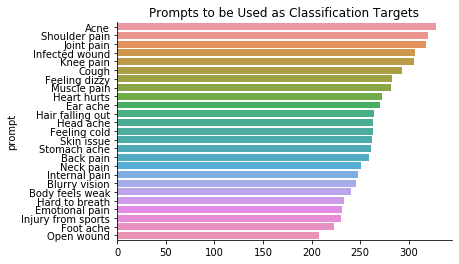

In [9]:
import seaborn as sns

grouped_series = df.groupby('prompt').agg('count')['speaker_id'].sort_values(ascending=False)
unique_prompts = len(df['prompt'].unique())
print("Number of unique prompts : ", unique_prompts)

sns.barplot(grouped_series.values, grouped_series.index)
plt.title('Prompts to be Used as Classification Targets')
sns.despine()

In [10]:
preprocess_df=df.drop('overall_quality_of_the_audio',axis=1)
preprocess_df

,file_name,phrase,prompt,speaker_id
0,1249120_43453425_58166571.wav,When I remember her I feel down,Emotional pain,43453425
1,1249120_43719934_43347848.wav,When I carry heavy things I feel like breaking...,Hair falling out,43719934
2,1249120_43719934_53187202.wav,there is too much pain when i move my arm,Heart hurts,43719934
3,1249120_31349958_55816195.wav,My son had his lip pierced and it is swollen a...,Infected wound,31349958
4,1249120_43719934_82524191.wav,My muscles in my lower back are aching,Infected wound,43719934
...,...,...,...,...
6656,1249120_14353703_45949288.wav,I feel a burning sensation in my guts about 2 ...,Stomach ache,14353703
6657,1249120_15004831_26452554.wav,I have a split on my thumb that will not heal.,Open wound,15004831
6658,1249120_15004831_64958100.wav,I feel a lot of pain in the joints.,Joint pain,15004831
6659,1249120_15830408_92962528.wav,The area around my heart doesn't feel good.,Heart hurts,15830408


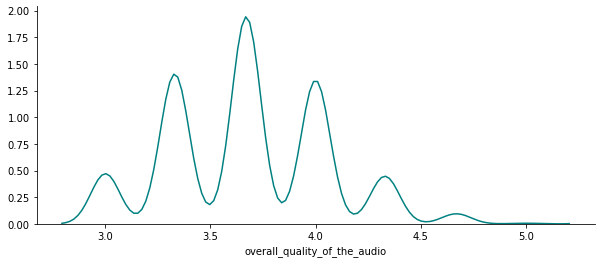

In [24]:
fig=plt.figure(figsize=(10,4))
sns.distplot(df['overall_quality_of_the_audio'],hist=False,color='teal')
sns.despine()

In [11]:
stop_words = set(stopwords.words('english')) 
word_dict = {}
preprocess_df['phrase'] = [i.lower() for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [i.replace('can\'t', 'can not') for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [i.replace('i\'m', 'i am') for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [i.replace('i\'ve', 'i have') for i in preprocess_df['phrase']]
preprocess_df['phrase'] = [' '.join([j for j in i.split(' ') if j not in stop_words]) for i in preprocess_df['phrase']]

for phrase in preprocess_df['phrase']:
    for word in phrase.split(' '):
        word = word.lower()
        if word in stop_words or word == '':
            pass
        elif word not in word_dict:
            word_dict[word] = 1
        else:
            word_dict[word] += 1
            
sorted_word_list = sorted(word_dict.items(), key=lambda kv: kv[1], reverse=True)

In [12]:
sorted_word_list

[('pain', 1550),
 ('feel', 1533),
 ('like', 507),
 ('get', 409),
 ('hurts', 380),
 ('back', 348),
 ('hair', 300),
 ('feels', 280),
 ('head', 268),
 ('body', 265),
 ('shoulder', 264),
 ('skin', 257),
 ('ache', 255),
 ('cold', 242),
 ('neck', 238),
 ('knee', 236),
 ('stomach', 232),
 ('heart', 225),
 ('ear', 215),
 ('foot', 213),
 ('sharp', 206),
 ('stand', 202),
 ('every', 185),
 ('time', 184),
 ('hard', 181),
 ('wound', 176),
 ('lot', 172),
 ('cut', 159),
 ('dizzy', 158),
 ('feeling', 157),
 ('cough', 148),
 ('something', 148),
 ('left', 145),
 ('breath', 145),
 ('walk', 143),
 ('face', 140),
 ('think', 139),
 ('go', 136),
 ('great', 133),
 ('tried', 127),
 ('joint', 127),
 ('inside', 126),
 ('sensation', 122),
 ('chest', 122),
 ('falling', 119),
 ('weak', 117),
 ('heavy', 116),
 ('acne', 116),
 ('see', 113),
 ('even', 112),
 ('vision', 109),
 ('try', 108),
 ('move', 107),
 ('red', 100),
 ('playing', 97),
 ('blurry', 97),
 ('infected', 96),
 ('since', 96),
 ('much', 94),
 ('take', 94),

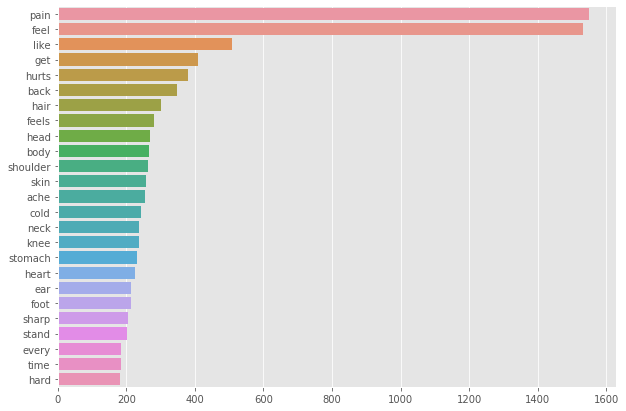

In [29]:
# e n most common words in the phrases.
n=25

fig=plt.figure(figsize=(10,7))
plt.style.use('ggplot')
sns.barplot([i[1] for i in sorted_word_list[:n]],[i[0] for i in sorted_word_list[:n]])

In [13]:
from nltk.corpus import stopwords 
import random
from scipy.io import wavfile
from tqdm import tqdm_notebook as tqdm
import tensorflow as tf
import os
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from tensorflow.python.keras.optimizer_v2.adam import Adam
from nltk.util import ngrams
from keras.callbacks import LearningRateScheduler
import nltk
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import glob
from PIL import Image

In [38]:
from nltk.util import ngrams

def get_ngrams(text,n):
    n_grams=ngrams((text),n)
    return [' '.join(i) for i in n_grams]   

def gramfreq(phrases,n,num):
    ngram_dict={}
    
    for phase in phrases:
        result=get_ngrams(phrase.split(' '),n)
        result_count=Counter(result)
        for gram in result_count.keys():
            if gram not in ngram_dict.keys():
                ngram_dict[gram]=1
            else:
                ngram_dict[gram]+=1
                
    df=pd.DataFrame.from_dict(ngram_dict,orient="index")
    df=df.rename({"index":"words",0:"frequency"})
    
    return df.sort_values(['frequency'],ascending=[0])[:num]

def gram_table(x, ns, result_length):
    output = pd.DataFrame(index=None)
    for n in ns:
        table = pd.DataFrame(gramfreq(x, n, result_length).reset_index())
        table.columns = [f"{n}-Gram",f"{n}-Occurence"]
        output = pd.concat([output, table], axis=1)
    return output

gram_df = gram_table(x=preprocess_df['phrase'], ns=[1,2,3,4], result_length=30)
gram_df.head(20)

KeyError: 'frequency'

In [14]:
base_dir = 'E:\\Education\\sem 10\\recordings - Copy\\'

train_files = [base_dir + 'train\\' + i for i in os.listdir(base_dir + 'train')]
val_files = [base_dir + 'validate/' + i for i in os.listdir(base_dir + 'validate')]
test_files = [base_dir + 'test/' + i for i in os.listdir(base_dir + 'test')]

all_files = train_files + test_files + val_files
len(all_files)

7042

In [15]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(preprocess_df['phrase'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
print(f'vocab_size : {vocab_size}')

phrases_seq = tokenizer.texts_to_sequences(preprocess_df['phrase'])
padded_phrases_seq = pad_sequences(phrases_seq, padding='post')
padded_phrases_seq = np.asarray(padded_phrases_seq)
max_seq_length = padded_phrases_seq.shape[0]
print("padded_phrases_seq shape : ", padded_phrases_seq.shape)

vocab_size : 1070
padded_phrases_seq shape :  (6661, 14)


In [16]:
random_phrase_num = random.randrange(0, len(preprocess_df))
random_import_phrase = df.loc[random_phrase_num, 'phrase']
random_phrase = preprocess_df.loc[random_phrase_num, 'phrase']

print('padded_phrase example : ' + '\n' + random_import_phrase + '\n' + random_phrase + '\n' + str(padded_phrases_seq[random_phrase_num]))

padded_phrase example : 
I feel pain inside I do not know what it is
feel pain inside know
[ 3  2 50 82  0  0  0  0  0  0  0  0  0  0]


In [ ]:
#os.listdir('../input/x-wav-array/x_wav_array.npy')
#/x_wav_array.npy')

In [54]:
wav_list = []
import librosa.display
from pathlib import Path
spec_dir = base_dir + 'spectrograms/'

def create_spectrogram(filename,name):
    plt.interactive(False)
    clip, sample_rate = librosa.load(filename, sr=None)
    fig = plt.figure(figsize=[2,2])
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    S = librosa.feature.melspectrogram(y=clip, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max))
    filename = Path("E:\\Education\\sem 10\\recordings - Copy\\spectro" + '.jpg')
    plt.savefig(filename, dpi=400, bbox_inches='tight',pad_inches=0)
    plt.close()    
    fig.clf()
    plt.close(fig)
    plt.close('all')
    del filename,name,clip,sample_rate,fig,ax,S

In [55]:
for file in tqdm(all_files, total=len(all_files)):
    create_spectrogram(file, file.split('/')[-1])

C:\Users\lalit\anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [35]:
exclude_file = "1249120_44142156_100535941.wav.jpg.jpg"
spec_filelist = [f'{i}.jpg' for i in all_files if i != '1249120_44142156_100535941.wav.jpg.jpg']
x_wav_array = ([np.array(Image.open(fname)) for fname in spec_filelist])
# x_wav_array = np.load('../input/x-wav-array/x_wav_array.npy')
# print(x_wav_array.shape)
print(spec_filelist)
print()
# print(x_wav_array)

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Education\\sem 10\\recordings - Copy\\train\\1249120_44142156_100535941.wav.jpg'

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
prompt_array = preprocess_df['prompt'].values.reshape(-1,1)
labels_onehot = enc.fit_transform(prompt_array).toarray()

labels_onehot.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(preprocess_df.index, labels_onehot, test_size = .2)

In [ ]:
x_phrase_train = padded_phrases_seq[x_train]
x_phrase_test = padded_phrases_seq[x_test]

x_wav_train = x_wav_array[x_train]
x_wav_test = x_wav_array[x_test]

try:
    del x_wav_array
except:
    pass

x_wav_train = np.stack(x_wav_train, axis=0)
x_wav_test = np.stack(x_wav_test, axis=0)

print(x_phrase_train.shape)
print(x_phrase_test.shape)

print(x_wav_train.shape)
print(x_wav_test.shape)

In [ ]:
def build_phrase_model(vocab_size, embedding_dim, rnn_units, max_seq_length):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(vocab_size + 1, ### Without +1, layer expects [0,1160) and our onehot encoded values include 1160
                                        embedding_dim, ### Output layer size
                                        input_length =  14))
    model.add(tf.keras.layers.LSTM(rnn_units))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(unique_prompts, activation='softmax'))
    return model

model = build_phrase_model(
    vocab_size = vocab_size,
    embedding_dim=100,
    rnn_units=150,
    max_seq_length=max_seq_length)

adam_opt = Adam(lr=0.01)

model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=2, min_delta=.005)


def exp_decay(epoch):
    initial_lrate = 0.01
    k = 0.1
    lrate = initial_lrate * np.exp(-k*epoch)
    return lrate
lrate = LearningRateScheduler(exp_decay)

callbacks_list = [earlystop_callback, lrate]

history = model.fit(x_phrase_train, y_train,
                    epochs=15, batch_size=30, validation_split = .2,
                    callbacks=callbacks_list)

In [ ]:
model_cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(x_phrase_test),axis=1))

fig = plt.figure(figsize=(15,10))
sns.heatmap(model_cm, annot=True, xticklabels=enc.categories_[0].tolist(), yticklabels=enc.categories_[0].tolist())

In [ ]:
from keras.constraints import max_norm
def build_wav_model(filters, input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters, 2, 2, activation='relu', padding="same", input_shape=input_shape, kernel_constraint=max_norm(3), bias_constraint=max_norm(3)))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(int(filters / 2), 2, 2, activation='relu', padding="same"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dropout(.2))
    #model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dense(unique_prompts, activation='softmax'))
    return model

wav_model = build_wav_model(
    filters = 32,
    input_shape = x_wav_train[0].shape)

adam_opt = Adam(lr=0.001)

wav_model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
wav_model.summary()

In [ ]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, min_delta=.005)

callbacks_list = [earlystop_callback]

In [ ]:
history = wav_model.fit(x_wav_train, y_train,epochs=15, batch_size=20, validation_split = .2,callbacks=callbacks_list)

In [ ]:
def alexnet(in_shape=x_wav_train[0].shape, n_classes=unique_prompts, opt='sgd'):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(in_shape))
    model.add(tf.keras.layers.Conv2D(96,11, strides=4, activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(3, 2))
    model.add(tf.keras.layers.Conv2D(256,5, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(3, 2))
    model.add(tf.keras.layers.Conv2D(384, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.Conv2D(256, 3, strides=1, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(3, 2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4096, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))

    return model

In [ ]:
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, min_delta=.005)

callbacks_list = [earlystop_callback]

alexnet_model = alexnet()

alexnet_model.compile(loss="categorical_crossentropy", optimizer='adam',
	              metrics=["accuracy"])

In [ ]:
history = alexnet_model.fit(x_wav_train, y_train,epochs=15, batch_size=20, validation_split = .2,callbacks=callbacks_list)

In [2]:
# 25.04.23
import vaex

In [3]:
df_vaex=vaex.open("C:\\Users\\lalit\\Downloads\\mfcc_features.csv")
df_vaex

AttributeError: module 'vaex' has no attribute 'open'